# Homework 12

https://scikit-learn.org/0.15/modules/scaling_strategies.html#incremental-learning

* Implement a mini batch functionality to train a regressor.
    - (Optional) If anyone want to do this in a pipeline can do this: https://koaning.github.io/tokenwiser/api/pipeline.html

* Save model, load the model again and test it on `X_test` __Do NOT commit the pickle file__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def test_df():
    
    df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)
    df = df.sample(5000, random_state=100).reset_index(drop=True)
    
    y = df['sellingprice']
    df.drop('sellingprice', axis=1, inplace=True)
    X = df
    
    return X,y

def partial_df():
    df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)
   
    while(True):
        yield df.sample(100).reset_index(drop=True)
        
gen = partial_df()

In [3]:
X_test, y_test = test_df()

In [4]:
# each time you call this you will get a new slice of the dataframe.
sample_df = next(gen)
sample_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2004,Nissan,Quest,3.5 S,Minivan,NaN,5n1bv28ux4n342573,ca,2.1,109897.0,white,tan,bhfc financial services inc,2350,3100,Tue Jan 20 2015 04:30:00 GMT-0800 (PST)
1,2014,Chevrolet,Cruze,2LT,Sedan,automatic,1g1pe5sb7e7420289,ut,1,17365.0,green,black,enterprise vehicle exchange / tra / rental / t...,13400,8800,Wed Feb 25 2015 04:30:00 GMT-0800 (PST)
2,2008,Nissan,Rogue,S,SUV,automatic,jn8as58v98w131176,va,2,112839.0,silver,gray,gm financial,6100,6700,Wed Jan 21 2015 01:30:00 GMT-0800 (PST)
3,2008,Hyundai,Entourage,Limited,minivan,automatic,kndmc233486056896,ca,3.7,55539.0,white,beige,hyundai motor america/co car,7625,10500,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
4,2002,Mercedes-Benz,E-Class,E320 4MATIC,Sedan,automatic,wdbjf82j82x061970,wi,2.1,194330.0,silver,black,capital one auto finance,1525,1900,Wed Feb 04 2015 02:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2000,Ford,F-150,XL,Extended Cab,automatic,1ftrx18wxynb74402,tx,1.9,174909.0,green,gray,improved credit lending,2000,1300,Wed Feb 11 2015 02:00:00 GMT-0800 (PST)
96,2010,Buick,Enclave,CXL2,SUV,automatic,5galrced4aj116282,tx,4.1,83587.0,brown,tan,david mcdavid acura,16100,16000,Wed Dec 31 2014 10:20:00 GMT-0800 (PST)
97,2011,Kia,Sorento,LX,SUV,automatic,5xyktca17bg071850,pa,4.4,41214.0,black,black,gateway kia of north brunswick,13100,13400,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
98,2014,Mazda,Mazda2,Touring,Hatchback,NaN,jm1de1lz7e0171158,pa,4.7,23268.0,red,black,avis rent a car/barbush rentals,10750,10600,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)


# Defining function to check the alpha values in the column of type float

In [5]:
# check_float() method returns all the values in the column that are not float
def check_float(x):
    if type(x) == float:
        return
    if x.isalpha() == True:
        return x

# Data Pre-Processing

In [6]:
def data_clean(data,y):
    result = data['condition'].apply(check_float)
    result = result[result.notnull()]
    data = data.drop(index=result.index)
    y = y.drop(index=result.index)
    # converting condition and mmr column in their respective datatypes 
    data[['condition', 'mmr']] = data[['condition', 'mmr']].apply(pd.to_numeric)
    
    #data['saledate'] = data['saledate'].apply(date_format)
    return data,y
    

# Defing Categorical and Numerical Columns

In [7]:
categorical_cols = ['year', 'make', 'model', 'trim', 'body', 'transmission','state','color', 'interior', 'seller']
numerical_cols = [ 'condition', 'odometer','mmr'] 

In [8]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Defining Pipelines

In [9]:
numerical_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])
set_config(display='diagram')
numerical_pipeline

Pipeline(steps=[('impute_missing', SimpleImputer(strategy='median')),
                ('standardize_num', StandardScaler())])

In [10]:
from sklearn.preprocessing import OneHotEncoder
categorical_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])
set_config(display='diagram')
categorical_pipeline

Pipeline(steps=[('impute_missing_cats',
                 SimpleImputer(strategy='most_frequent')),
                ('create_dummies_cats',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [11]:
transformed_categorical_columns = categorical_pipeline.fit_transform(sample_df[categorical_cols]).shape[1]

# the columns that are created after passing into OneHotEncoder
actual_categorical_columns = categorical_pipeline.named_steps['create_dummies_cats'].get_feature_names_out().shape[0]

print("Actual categorical columns:",actual_categorical_columns)
print("Transformed categorical columns:",transformed_categorical_columns)

Actual categorical columns: 317
Transformed categorical columns: 317


In [12]:
from sklearn.compose import ColumnTransformer
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', numerical_pipeline, numerical_cols),
                                                      ('create_dummies', categorical_pipeline, categorical_cols)])

processing_pipeline

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['condition', 'odometer', 'mmr']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['year', 'make', 'model', 'trim', 'body',
                                  'transmission', 'state', 'color', 'interior',
                                  'seller'])])

# Fitting the features of the dataset

In [13]:
df1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)
X1 = df1.drop(['sellingprice','vin','saledate'],axis=1)

y1 = df1['sellingprice'] 
X1f,y1f = data_clean(X1,y1)
X1_transformed = processing_pipeline.fit_transform(X1f)

# Mini batch functionality to train a regressor

In [14]:
from sklearn.linear_model import SGDRegressor
import joblib


learning_rate=0.01
n_epochs=100
batch_size=32
n_samples, n_features = 100,df1.shape[1]
coef_ = np.zeros(n_features)
intercept_ = 0
n_batches = int(np.ceil(n_samples /batch_size))
cost_list = []
epoch_list = []
min_cost = 1000000000
for epoch in range(n_epochs):
    sample_data = next(gen)
    y = sample_data['sellingprice']
    X = sample_data.drop(['sellingprice','vin','saledate'],axis=1)
    X,y = data_clean(X,y)
    Xf = processing_pipeline.transform(X)
    
    for i in range(n_batches):
        X_batch = Xf[i*batch_size:(i+1)*batch_size]
        y_batch = y[i*batch_size:(i+1)*batch_size]
        #model fitting
        SGD = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=20000, tol=1e-3, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10, warm_start=True)
        SGD.fit(X_batch,y_batch) 

        y_pred = SGD.predict(X_batch)
        gradient = np.dot(X_batch.T, (y_pred - y_batch)) / X_batch.shape[0]
        coef_ = np.zeros(len(learning_rate * gradient))
        coef_ = coef_ - (learning_rate * gradient)
        intercept_ =intercept_ - (learning_rate * np.mean(y_pred - y_batch))
        
        #calculating the cost
        cost = np.mean(np.square(y_batch-y_pred))
        if cost< min_cost:
            min_cost = cost
            joblib.dump(SGD, 'model.pkl')
        cost_list.append(cost)
    epoch_list.append(epoch)

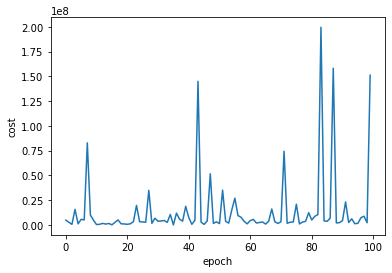

In [15]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list[:100])

In [16]:
min(cost_list)

1724.9522003253753

In [17]:
import joblib

joblib.dump(SGD, 'model.pkl')

['model.pkl']

# Loading the saved model

In [18]:
model = joblib.load('model.pkl')
model

SGDRegressor(early_stopping=True, learning_rate='constant', max_iter=20000,
             n_iter_no_change=10, warm_start=True)

# Testing on the test data

In [19]:
# contating 
f_df = pd.concat([X_test,y_test],axis=1)
# data cleaning
Xf,yf = data_clean(f_df.drop(['sellingprice','vin','saledate'],axis=1),f_df['sellingprice'])
# transforming the test data
f= processing_pipeline.transform(Xf)
# predicting the test data
yff = model.predict(f)
score = model.score(f,yf)*-1
print('The Score of the model is:',score)

The Score of the model is: 0.4758432676870423
